# Procesamiento de Imágenes satelitales

## Información sobre estructura de archivos NC

1) Importación de librerías

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np
from pyproj import Proj

In [14]:
!pip install pyproj


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


2) Seleccionar una imagen de ejemplo

In [11]:
ruta_imagenes = "../data/raw/imagenes_satelitales/"

3) Creamos la visualización

✅ Archivo '2017-03-25_2000_UTC_C13.nc' abierto exitosamente.
✅ Imagen recortada a la zona de Mendoza.


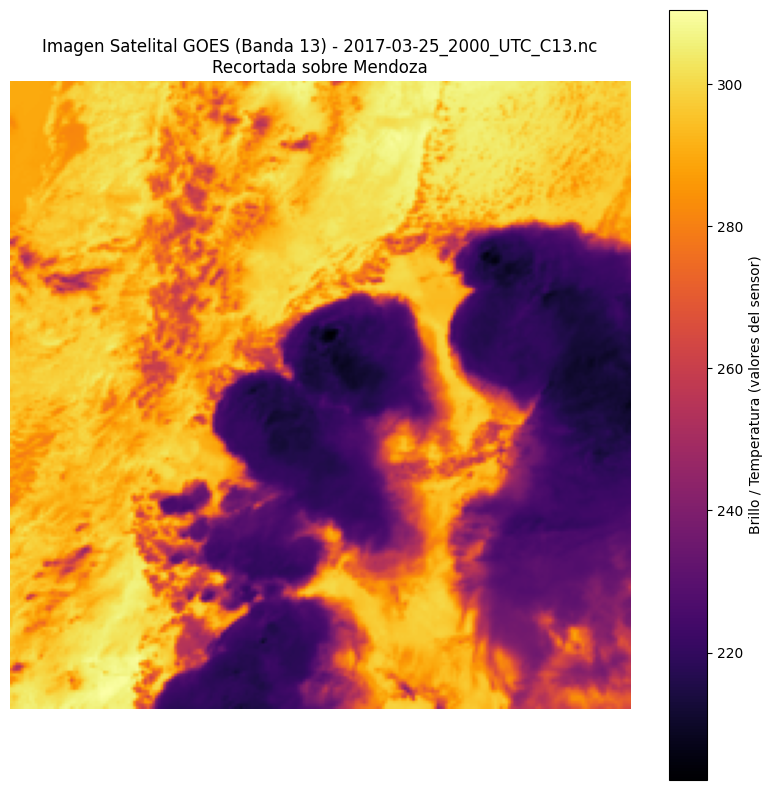

In [16]:
try:
    # Asegúrate de tener al menos una imagen descargada con el script de la notebook 07
    nombre_archivo_ejemplo = os.listdir(ruta_imagenes)[0]
    ruta_completa = os.path.join(ruta_imagenes, nombre_archivo_ejemplo)
    ds = xr.open_dataset(ruta_completa)
    print(f"✅ Archivo '{nombre_archivo_ejemplo}' abierto exitosamente.")

    # --- 3. Recortar la Imagen a la Región de Mendoza (MÉTODO PRECISO) ---
    # Extraemos la información de la proyección del satélite del archivo
    proj_info = ds.goes_imager_projection
    lon_cen = proj_info.longitude_of_projection_origin
    h_sat = proj_info.perspective_point_height
    
    # Creamos el objeto de proyección geoestacionaria
    p = Proj(proj='geos', h=h_sat, lon_0=lon_cen)

    # Definimos las coordenadas de la región de Mendoza
    lon_min, lon_max = -70.5, -66.5
    lat_min, lat_max = -37.5, -32.0

    # Convertimos nuestras coordenadas de lat/lon a las coordenadas 'x' e 'y' del satélite (en metros)
    x1, y1 = p(lon_min, lat_min)
    x2, y2 = p(lon_max, lat_max)
    
    # Las coordenadas 'x' e 'y' en el archivo están en radianes multiplicados por la altura del satélite.
    # Las convertimos a metros para que coincidan con la salida de pyproj.
    ds['x'] = ds['x'] * h_sat
    ds['y'] = ds['y'] * h_sat

    # Usamos .sel() de xarray para "recortar" la imagen a ese cajón de coordenadas
    imagen_recortada = ds.sel(x=slice(x1, x2), y=slice(y2, y1))
    print("✅ Imagen recortada a la zona de Mendoza.")

    # --- 4. Visualizar la Imagen Recortada ---
    plt.figure(figsize=(10, 10))
    # Seleccionamos la variable de la imagen (Cloud and Moisture Imagery)
    plt.imshow(imagen_recortada['CMI'], cmap='inferno')
    plt.colorbar(label='Brillo / Temperatura (valores del sensor)')
    plt.title(f'Imagen Satelital GOES (Banda 13) - {nombre_archivo_ejemplo}\nRecortada sobre Mendoza')
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"❌ Ocurrió un error: {e}. Asegúrate de tener archivos en la carpeta '{ruta_imagenes}'.")